# Proyek Analisis Data: RENTAL BIKE
- **Nama:** Brigade Mahendra
- **Email:** m180b4ky0874@bangkit.academy
- **ID Dicoding:** brigade_mahendra

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan rental ketika weekday, holiday, dan workingday setiap bulannya?
- Apakah pengaruh cuaca terhadap kondisi rental ketika weekday, holiday, dan workingday?
- Apakah pengaruh musim terhadap kondisi rental ketika weekday, holiday, dan workingday?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pembukaan data **"Hari"**

In [5]:
hari_df = pd.read_csv("https://raw.githubusercontent.com/Esylum/Rental-Bike-Analysis/refs/heads/main/Data/day.csv")
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pembukaan data **"Jam"**

In [6]:
jam_df = pd.read_csv("https://raw.githubusercontent.com/Esylum/Rental-Bike-Analysis/refs/heads/main/Data/hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan pemanggilan data **Day** dengan pendefinisian **hari_df** dan data **Hour** dengan pendefinisian **jam_df** dengan fitur **.pd.read_csv()**.
- Melakukan command **.head()** untuk menampilkan baris dan kolom awal data.

### Assessing Data

##Menilai tabel **hari_df**

1. Memeriksa tipe data

In [7]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Menilai jumlah data yang hilang

In [8]:
hari_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


3. Menilai jumlah data duplikat

In [9]:
print("Jumlah data duplikat: ", hari_df.duplicated().sum())

Jumlah data duplikat:  0


4. Memeriksa keanehan data numerik

In [10]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##Menilai tabel **jam_df**

1. Memeriksa tipe data

In [11]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Menilai jumlah data yang hilang

In [12]:
jam_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


3. Menilai jumlah data duplikat

In [13]:
print("Jumlah data duplikat:", jam_df.duplicated().sum())

Jumlah data duplikat: 0


4. Memeriksa keanehan data numerik

In [14]:
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Memeriksa tipe data yang digunakan menggunakan fitur **.info()**
- Menilai jumlah data yang hilang dengan fitur **.isna().sum()**, jumlah data yang terduplikat dengan fitur **.duplicate().sum()**
- Memeriksa keanehan data numerik pada kedua dataset dengan fitur **.describe()**

### Cleaning Data

## Filter **hari_df**

1. Menghapus kolom data yang tidak digunakan
    - Instant: tidak memberikan data mendukung pertanyaan
    - Windspeed: tidak ditanyakan dalam pertanyaan
    - Casual: tidak ditanyakan dalam pertanyaan
    - Registered: tidak ditanyakan dalam pertanyaan
    - Hum: tidak ditanyakan dalam pertanyaan
    - temp: tidak ditanyakan dalam pertanyaan
    - atemp: tidak ditanyakan dalam pertanyaan
    - hum: tidak ditanyakan dalam pertanyaan

In [18]:
hari_df.drop(columns=[
    'instant', 'windspeed', 'casual',
    'registered', 'hum', 'temp', 'atemp', 'yr'
    ], inplace = True)
hari_df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,cnt
0,2011-01-01,1,1,0,6,0,2,985
1,2011-01-02,1,1,0,0,0,2,801
2,2011-01-03,1,1,0,1,1,1,1349
3,2011-01-04,1,1,0,2,1,1,1562
4,2011-01-05,1,1,0,3,1,1,1600


2. Mengubah nama untuk setiap kolom data yang digunakan
    - Mempermudah pemanggilan data
    - Mempermudah pembacaan data

In [19]:
hari_df.rename(columns = {
    'dteday':'tanggal',
    'mnth':'bulan',
    'weathersit':'cuaca',
    'season':'musim',
    'cnt':'jumlah'
    }, inplace = True)
hari_df.head()

,tanggal,musim,bulan,holiday,weekday,workingday,cuaca,jumlah
0,2011-01-01,1,1,0,6,0,2,985
1,2011-01-02,1,1,0,0,0,2,801
2,2011-01-03,1,1,0,1,1,1,1349
3,2011-01-04,1,1,0,2,1,1,1562
4,2011-01-05,1,1,0,3,1,1,1600


3. Mengubah variabel data dari numerik menjadi keterangan
    - bulan = Januari - Desember
    - weekday = Senin - Minggu
    - workingday = Senin - Jumat
    - Musim = Spring, Summer, Fall, Winter
    - Weather = Cerah, Berawan, Hujan, Badai

In [20]:
hari_df['bulan'] = hari_df['bulan'].map({
    1: 'Januari', 2:'Februari', 3:'Maret',
    4:'April', 5:'Mei', 6:'Juni', 7:'Juli',
    8:'Agustus', 9:'September', 10:'Oktober',
    11:'November', 12:'Desember'
})

hari_df['musim'] = hari_df['musim'].map({
    1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
})

hari_df['cuaca'] = hari_df['cuaca'].map({
    1:'Cerah', 2:'Berawan', 3:'Hujan', 4:'Badai'
})

4. Mengubah tipe data tanggal menjadi **datetime()**

In [21]:
hari_df['tanggal'] = pd.to_datetime(hari_df['tanggal'])
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     731 non-null    datetime64[ns]
 1   musim       731 non-null    object        
 2   bulan       731 non-null    object        
 3   holiday     731 non-null    int64         
 4   weekday     731 non-null    int64         
 5   workingday  731 non-null    int64         
 6   cuaca       731 non-null    object        
 7   jumlah      731 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 45.8+ KB


5. Mengubah tipe data menjadi category

In [22]:
hari_df['bulan'] = hari_df.bulan.astype('category')
hari_df['musim'] = hari_df.musim.astype('category')
hari_df['cuaca'] = hari_df.cuaca.astype('category')
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     731 non-null    datetime64[ns]
 1   musim       731 non-null    category      
 2   bulan       731 non-null    category      
 3   holiday     731 non-null    int64         
 4   weekday     731 non-null    int64         
 5   workingday  731 non-null    int64         
 6   cuaca       731 non-null    category      
 7   jumlah      731 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(4)
memory usage: 31.5 KB


##Filter **jam_df**

1. Menghapus data jam_df karena tidak berkaitan dengan pertanyaan bisnis yang diajukan.

In [15]:
del jam_df

## Exploratory Data Analysis (EDA)

### Explore data **hari_df**

# Mengelompokkan data **weekday**, **workingday**, **holiday**

1. Berdasarkan **bulan**

In [23]:
hari_df.groupby(by='bulan', observed=True).agg({
    'weekday': ['max', 'min', 'mean', 'sum'],
    'workingday':['max', 'min', 'mean', 'sum'],
    'holiday': ['max', 'min', 'mean', 'sum']
})

weekday                    workingday                   holiday      \
              max min      mean  sum        max min      mean sum     max min   
bulan                                                                           
Agustus         6   0  3.000000  186          1   0  0.741935  46       0   0   
April           6   0  3.000000  180          1   0  0.666667  40       1   0   
Desember        6   0  3.064516  190          1   0  0.661290  41       1   0   
Februari        6   0  3.000000  171          1   0  0.684211  39       1   0   
Januari         6   0  2.870968  178          1   0  0.645161  40       1   0   
Juli            6   0  2.935484  182          1   0  0.661290  41       1   0   
Juni            6   0  3.100000  186          1   0  0.716667  43       0   0   
Maret           6   0  3.096774  192          1   0  0.725806  45       0   0   
Mei             6   0  2.903226  180          1   0  0.693548  43       1   0   
November        6   0  3.033333  182          1   0  0.666667  40       1   0   
Oktober         6   0  2.919355  181          1   0  0.677419  42       1   0   
September       6   0  3.050000  183          1   0  0.666667  40       1   0   

                         
               mean sum  
bulan                    
Agustus    0.000000   0  
April      0.033333   2  
Desember   0.032258   2  
Februari   0.035088   2  
Januari    0.048387   3  
Juli       0.032258   2  
Juni       0.000000   0  
Maret      0.000000   0  
Mei        0.032258   2  
November   0.066667   4  
Oktober    0.032258   2  
September  0.033333   2

2. Berdasarkan **musim**

In [24]:
hari_df.groupby(by='musim', observed=True).agg({
    'weekday': ['max', 'min', 'mean', 'sum'],
    'workingday':['max', 'min', 'mean', 'sum'],
    'holiday': ['max', 'min', 'mean', 'sum']
})

weekday                    workingday                    holiday      \
           max min      mean  sum        max min      mean  sum     max min   
musim                                                                         
Fall         6   0  3.031915  570          1   0  0.696809  131       1   0   
Spring       6   0  3.000000  543          1   0  0.662983  120       1   0   
Summer       6   0  2.989130  550          1   0  0.695652  128       1   0   
Winter       6   0  2.966292  528          1   0  0.679775  121       1   0   

                      
            mean sum  
musim                 
Fall    0.021277   4  
Spring  0.038674   7  
Summer  0.021739   4  
Winter  0.033708   6

3. Berdasarkan **cuaca**

In [25]:
hari_df.groupby(by='cuaca', observed=True).agg({
    'weekday': ['max', 'min', 'mean', 'sum'],
    'workingday':['max', 'min', 'mean', 'sum'],
    'holiday': ['max', 'min', 'mean', 'sum']
})

weekday                     workingday                    holiday      \
            max min      mean   sum        max min      mean  sum     max min   
cuaca                                                                           
Berawan       6   0  3.064777   757          1   0  0.716599  177       1   0   
Cerah         6   0  2.952484  1367          1   0  0.663067  307       1   0   
Hujan         6   0  3.190476    67          1   0  0.761905   16       0   0   

                       
             mean sum  
cuaca                  
Berawan  0.024291   6  
Cerah    0.032397  15  
Hujan    0.000000   0

# Hubungan antara **weekday**, **workingday**, **holiday**

Visualisasi **heatmap** korelasi data **hari_df**

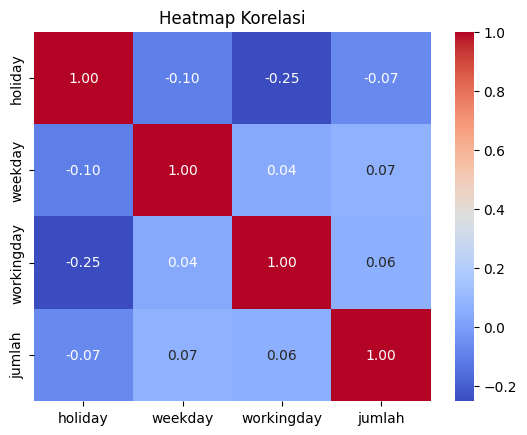

In [26]:
correlation_matrix = hari_df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True,
            cmap = 'coolwarm', fmt = ".2f")
plt.title("Heatmap Korelasi")
plt.show()

**Insight:**
* Data **hari_df**
  1. Holiday
    - Korelasi dengan weekday (Hari Kerja): -0.10, artinya ada korelasi negatif yang sangat lemah. Ini menunjukkan bahwa pada hari libur, hari kerja memiliki sedikit kecenderungan untuk berkurang, meskipun korelasinya sangat lemah.
    - Korelasi dengan workingday (Hari Kerja Aktif): -0.25, ini adalah korelasi negatif yang lebih kuat dibandingkan dengan weekday. Ini menunjukkan bahwa ketika ada libur, jumlah hari kerja aktif berkurang lebih signifikan.
    - Korelasi dengan jumlah: -0.07, korelasi yang sangat lemah dan negatif, menunjukkan hampir tidak ada hubungan antara hari libur dan variabel jumlah.
  2. Weekday
    - Korelasi dengan holiday (Libur): -0.10, seperti dijelaskan di atas, ada hubungan negatif yang sangat lemah antara hari kerja dan hari libur.
    - Korelasi dengan workingday (Hari Kerja Aktif): 0.04, hubungan positif yang sangat lemah. Ini menunjukkan bahwa jumlah hari kerja aktif sedikit meningkat pada hari kerja, tetapi korelasinya sangat kecil.
    - Korelasi dengan jumlah: 0.07, hubungan positif yang lemah, menunjukkan bahwa jumlah (mungkin jumlah total kerja atau aktivitas) sedikit meningkat pada hari kerja.
  3. Workingday
    - Korelasi dengan holiday (Libur): -0.25, korelasi negatif yang signifikan, menunjukkan bahwa ketika ada hari libur, jumlah hari kerja aktif cenderung berkurang.
    - Korelasi dengan weekday (Hari Kerja): 0.04, hubungan yang sangat lemah, menunjukkan bahwa tidak ada hubungan yang signifikan antara hari kerja biasa dan hari kerja aktif.
    - Korelasi dengan jumlah: 0.06, hubungan positif yang lemah, menunjukkan bahwa hari kerja aktif sedikit berhubungan dengan peningkatan dalam jumlah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rental ketika weekday, holiday, dan workingday setiap bulannya?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


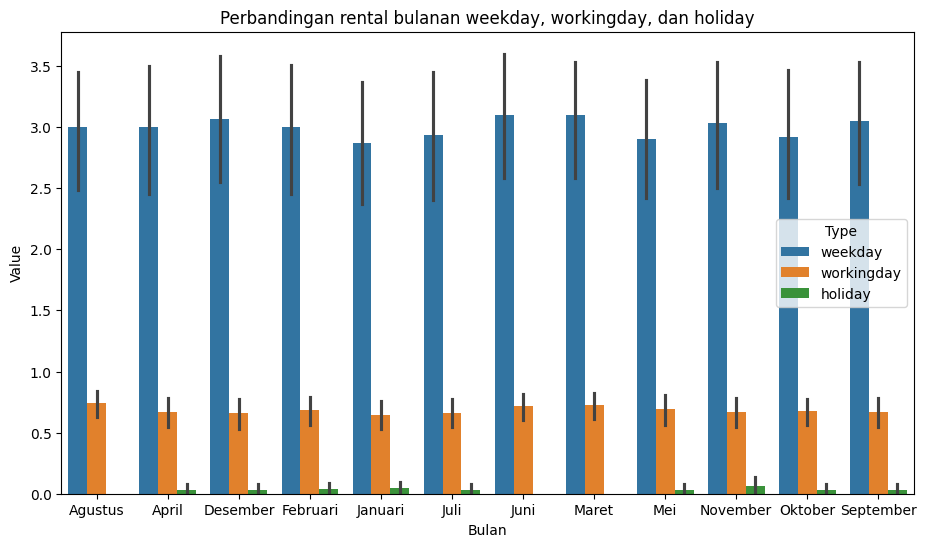

In [27]:
hari_df_melted = pd.melt(hari_df, id_vars=['bulan'], value_vars=['weekday', 'workingday', 'holiday'],
                         var_name='Type', value_name='Value')

plt.figure(figsize = (11,6))

sns.barplot(x='bulan', y='Value', hue='Type', data=hari_df_melted)

plt.title('Perbandingan rental bulanan weekday, workingday, dan holiday')
plt.xlabel('Bulan')
plt.ylabel('Value')
plt.show()

### Pertanyaan 2: Apakah pengaruh cuaca terhadap kondisi rental ketika weekday, holiday, dan workingday?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


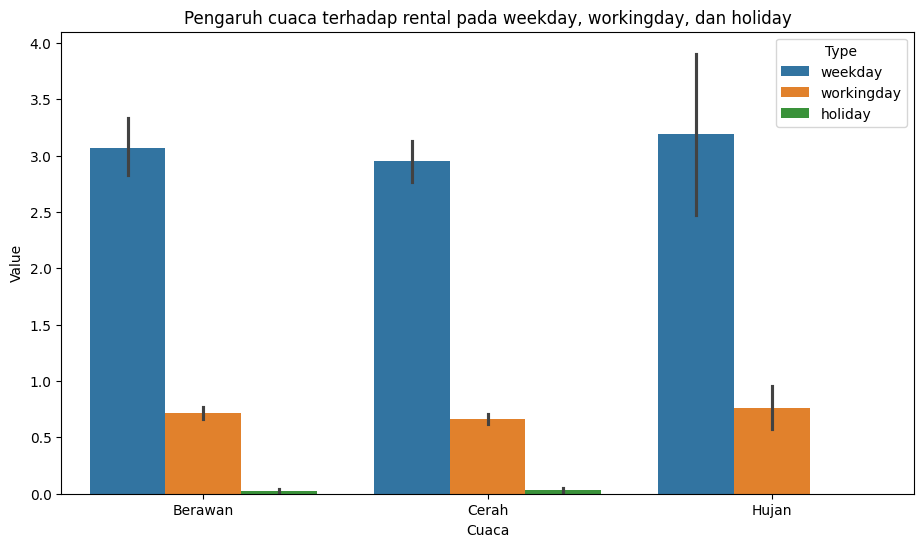

In [28]:
hari_df_melted = pd.melt(hari_df, id_vars=['cuaca'], value_vars=['weekday', 'workingday', 'holiday'],
                         var_name='Type', value_name='Value')

plt.figure(figsize = (11,6))

sns.barplot(x='cuaca', y='Value', hue='Type', data=hari_df_melted)

plt.title('Pengaruh cuaca terhadap rental pada weekday, workingday, dan holiday')
plt.xlabel('Cuaca')
plt.ylabel('Value')
plt.show()

### Pertanyaan 3: Apakah pengaruh musim terhadap kondisi rental ketika weekday, holiday, dan workingday?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


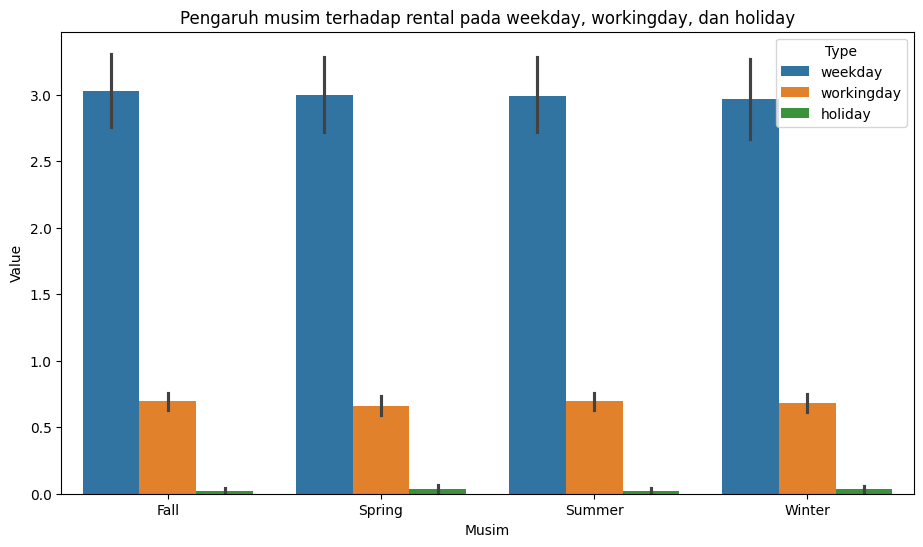

In [30]:
hari_df_melted = pd.melt(hari_df, id_vars=['musim'], value_vars=['weekday', 'workingday', 'holiday'],
                         var_name='Type', value_name='Value')

plt.figure(figsize = (11,6))

sns.barplot(x='musim', y='Value', hue='Type', data=hari_df_melted)

plt.title('Pengaruh musim terhadap rental pada weekday, workingday, dan holiday')
plt.xlabel('Musim')
plt.ylabel('Value')
plt.show()

**Insight:**
1. Perbandingan bulan
  - Weekday memiliki jumlah rental tertinggi di semua bulan dibandingkan dengan hari workingday dan holiday. Hal ini konsisten di seluruh bulan, dengan rata-rata rental lebih dari 3.0.
  - Workingday memiliki jumlah rental kedua tertinggi, namun jauh di bawah weekday. Dalam semua bulan, perbedaan ini cukup signifikan.
  - Holiday memiliki jumlah rental yang paling rendah dibandingkan dengan kedua tipe hari lainnya (weekday dan workingday). Pada bulan tertentu, jumlah rental di hari libur bahkan mendekati nol.
  - Pola dari bulan ke bulan cukup konsisten, dengan variasi kecil pada tingkat rental di semua tipe hari. Tidak ada perbedaan mencolok antara bulan yang satu dengan yang lain.
2. Pengaruh cuaca
  - Saat Weekday, cuaca berawan, cerah, dan hujan tidak menunjukkan perbedaan signifikan terhadap jumlah rental pada weekday. Jumlah rental tetap tinggi di sekitar 3.0–3.5, tanpa perubahan drastis berdasarkan cuaca.
  - Pada workingday, jumlah rental lebih rendah dibandingkan weekday untuk semua kondisi cuaca. Cuaca berawan dan hujan sedikit mengurangi jumlah rental, tetapi tidak terlalu drastis. Cuaca cerah menunjukkan jumlah rental yang hampir sama dengan cuaca berawan dan hujan, meskipun sedikit lebih rendah.
  - Pada holiday, jumlah rental sangat rendah, terutama ketika cuaca cerah dan hujan, hampir mendekati nol. Cuaca berawan juga menunjukkan jumlah rental yang rendah, tetapi sedikit lebih tinggi dibandingkan cuaca lainnya.
3. Pengaruh musim
  - Weekday, di semua musim (Fall, Spring, Summer, Winter), jumlah rental pada weekday selalu berada pada level tertinggi, mendekati atau lebih dari 3. Tidak terlihat perbedaan signifikan dalam jumlah rental pada weekday antara musim-musim yang berbeda. Setiap musim menunjukkan tren rental yang konsisten.
  - Rental pada workingday lebih rendah dibandingkan dengan weekday, namun konsisten di semua musim. Musim Fall dan Summer menunjukkan rental sedikit lebih tinggi dibandingkan Spring dan Winter.
  - Holiday, seperti grafik sebelumnya, rental pada holiday berada pada level terendah di semua musim. Musim Spring dan Summer tampaknya memiliki jumlah rental terendah pada holiday, dengan hampir nol aktivitas rental, sementara musim Fall dan Winter memiliki jumlah yang sedikit lebih tinggi, meski tetap sangat rendah.


## Conclusion

- Conclution pertanyaan 1: Weekday adalah hari yang paling banyak digunakan untuk rental dibandingkan dengan workingday dan holiday. Holiday menunjukkan jumlah rental yang sangat rendah, mengindikasikan bahwa mungkin lebih sedikit orang yang melakukan rental pada hari libur. Perbandingan rental ini stabil di setiap bulan, menunjukkan pola yang tetap.
- Conclution pertanyaan 2: Weekday tetap menjadi hari dengan rental tertinggi, terlepas dari kondisi cuaca. Cuaca cerah dan hujan menunjukkan pengaruh yang lebih besar dalam menurunkan jumlah rental pada workingday dan holiday, terutama pada hari libur. Holiday memiliki jumlah rental yang sangat rendah untuk semua kondisi cuaca, menunjukkan bahwa cuaca mungkin lebih berpengaruh pada hari-hari tersebut.
- Conclution pertanyaan 3: Weekday tetap menjadi hari dengan rental tertinggi di semua musim, tanpa perubahan signifikan antara musim yang satu dengan yang lain. Musim tampaknya tidak memengaruhi jumlah rental secara signifikan pada weekday atau workingday. Holiday terus menunjukkan rental yang rendah di semua musim, dengan musim Spring dan Summer memiliki rental yang paling rendah.Tidak ada musim tertentu yang secara drastis meningkatkan atau menurunkan jumlah rental, yang menunjukkan bahwa faktor musim tidak memiliki pengaruh besar pada pola rental, terutama pada weekday.